# Redes neuronales

 Vamos a ver ejemplos de uso de redes neuronales en dos sistemas distintos:
 
 * En primer lugar, usaremos el módulo `neural_network` de scikit_learn para ilustrar la capacidad expresiva de los clasificadores basados en redes neuronales. También lo aplicaremos al ejemplo del cáncer de mama.
 * Sin embargo, hay que decir que scikit_learn no es el sistema más usado para trabajar con redes neuronales. Por este motivo, nos apartaremos momentáneamente de scikit para dar una pequeña introducción del uso del módulo *Keras*, ejecutándose sobre *Tensorflow*, una de las bibliotecas python más usada para el trabajo con redes neuronales.

# Parte 1: Redes neuronales en scikit_learn

Los ejemplos y la discusión de esta primera parte está tomada del libro:

[*Introduction to Machine Learning with Python*](http://shop.oreilly.com/product/0636920030515.do)  
**Andreas C. Müller & Sarah Guido**  
O'Reilly 2017

Github con el material del libro: [Github](https://github.com/amueller/introduction_to_ml_with_python). 

El libro está accesible *online* desde la [Biblioteca de la Universidad de Sevilla](https://fama.us.es), como recurso electrónico.

Se han realizado algunos pequeños cambios respecto de lo mostrado en los vídeos del curso, debido a los cambios en las versiones actuales. Esta primera parte se ha comprobado con la versión 0.23.2

In [1]:
from sklearn import __version__ as version_actual
version_actual

'1.0.1'

In [2]:
import mglearn

También cargamos matplotlib y numpy:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

El módulo para trabajar con redes neuronales en scikit_learn es `neural_network`, y dentro del mismo `MLPClassifier` nos permitirá usar las redes multicapa hacia adelante, las que hemos visto en este tema. Con `MLPRegressor` haríamos regresión, aunque en este cuaderno no lo usaremos. 

In [4]:
from sklearn.neural_network import MLPClassifier

En primer lugar, vamos a probar con un conjunto de datos "de juguete", mediante el método `make_moons`. Crearemos dos conjutos de datos aleatorios, en dos clases distintas: 

In [5]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

Los siguiente construye y entrena una red neuronal multicapa. Por defecto, con una capa oculta y 100 unidades en ese capa. No entraremos en detalle sobre los algoritmos de optimización que se pueden usar, pero decir simplemente que el más parecido a lo visto en los vídeos es `sgd`, aunque bastante más sofisticado y con muchos parámetros ajustables. 

El método `lbfgs` funciona relativamente bien con conjuntos de datos no muy grandes, y no necesita tantos ajustes. Por tanto, es el que usaremos en estos ejemplos:

In [6]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

El siguiente gráfico nos muestra la frontera de decisión que el modelo ha aprendido. Las dos regiones (roja y azul) marcan la clasificación que el modelo aprendido asignaría a los puntos en esas regiones. 

La primera cuestión reseñable es que ya no es una frontera lineal:

Text(0, 0.5, 'Característica 1')

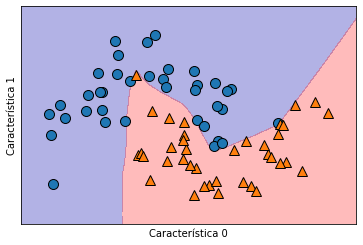

In [7]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

El número de unidades por defecto en la única capa oculta (100) es demasiado grande para este conjunto de datos. Vamos a reducir drásticamente el número de unidades a 10. Usamos el parámetro `hidden_layer_sizes` para indicar cuántas capas ocultas queremos (en este caso una) y cuantas unidades en cada acapa (10 en este caso):  

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])

Entrenamos la red:

In [9]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=[10], random_state=0, solver='lbfgs')

Lo que se muestra como salida es la descrición completa de todos los parámetros de la red que se ha creado. Como se observa, por defecto se toma ReLU.

Como se observa en la siguiente gráfica, la frontera de decisión aprendida es igual de buena que con la versión con 100 unidades:

Text(0, 0.5, 'Característica 1')

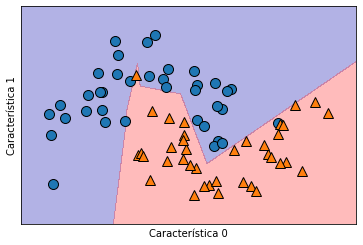

In [10]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

La frontera de decisión anterior es bastante "abrupta". Si queremos obtener algo más "suave", podemos introducir más unidades (como anteriormente), o también construir una red neuronal con dos capas ocultas, cada una con 10 unidades. O incluso usar `tanh`como función de activación. Las dos siguiente figuras ilustran esto:

Text(0, 0.5, 'Característica 1')

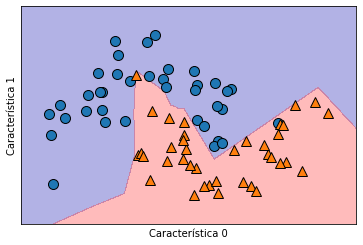

In [11]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

Text(0, 0.5, 'Característica 1')

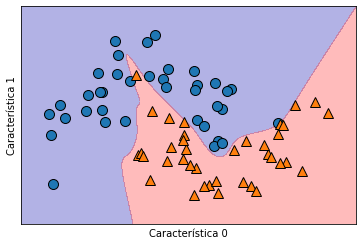

In [12]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

El parámetro que marca la cantidad de regularización *L2*, como en los modelos lineales, es `alpha`. La regularización es otro de los factores que nos sirve para controlar la complejidad de la red. En este caso, a través de la magnitud de los pesos. 

Lo que sigue muestra las distintas fronteras de decisión, más o menos ajustadas, que se obtienen variando la cantidad de regularización y el número de unidades en dos capas ocultas:

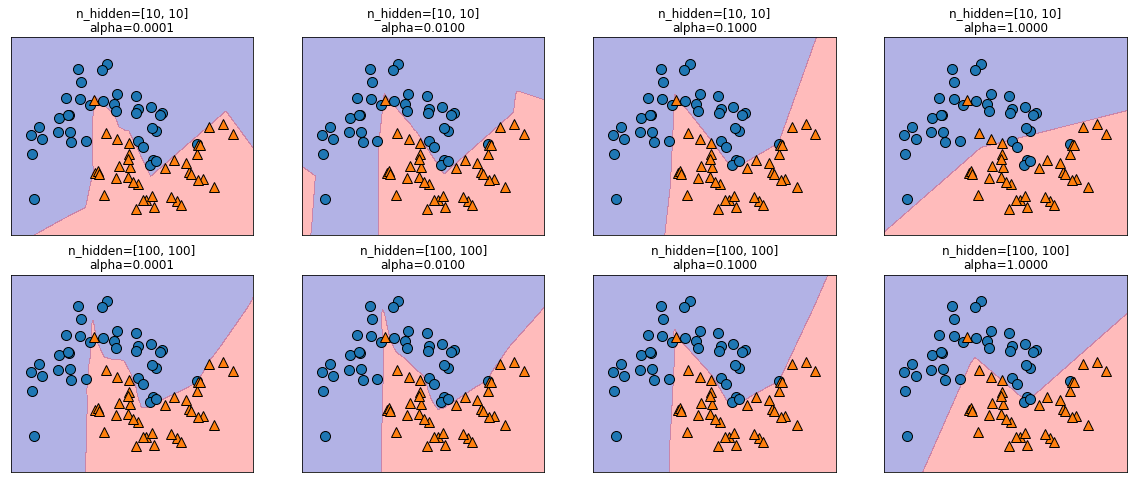

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha,max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

Acabamos de ver que hay al menos tres factores con los que podemos controlar la complejidad de la red, y por tanto su capacidad de (sobre)ajuste y/o generalización. Estos factores son:

* El número de capas ocultas
* El número de unidades en cada capa
* La cantidad de regularización

Estos no son los únicos factores que sirven para controlar la complejidad de una red, como se ha visto en las diapositivas. 

Otro punto importante a destacar en la inicialización de los pesos. Cuando la red es grande y está bien ajustada, la influencia de los pesos iniciales no debería ser demasiado grande. pero al menos para redes pequeñas sí hay que tener en cuenta esta circunstancia, que lleva a que aún cuando se usen redes con la misma estructura, se podrían obtener distintos modelos debido a los diferentes pesos iniciales:

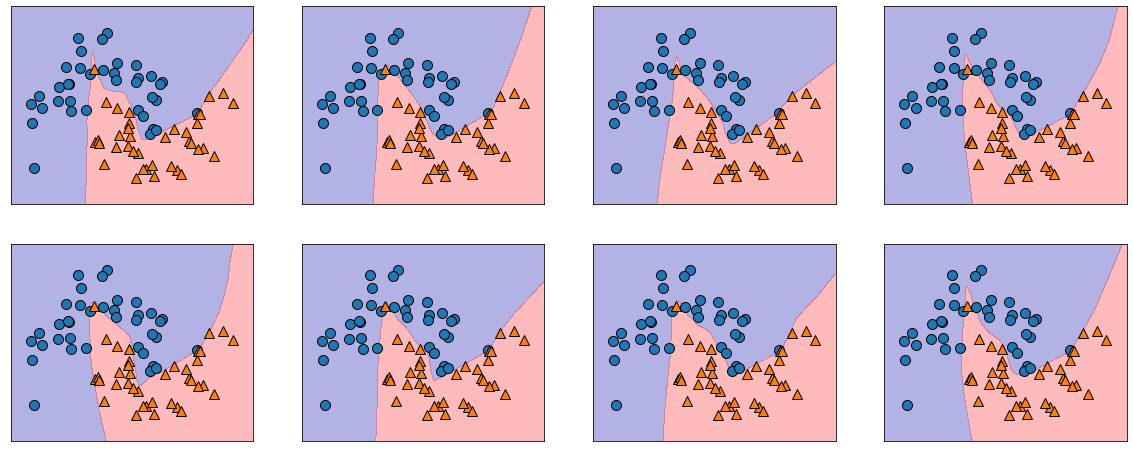

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100],max_iter=500)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

### Aplicando una red neuronal al conjunto de datos del cáncer de mama

Apliquemos ahora un modelo de redes neuronales a un problema real, el conjunto de datos del cáncer de mama que ya hemos usado en temas anteriores:

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

En primer lugar usamos el modelo con los valores por defecto, obteniendo un rendimiento bastante malo:

In [17]:
mlp = MLPClassifier(solver="lbfgs",random_state=42,max_iter=1000)
mlp.fit(X_train, y_train)

print("Rendimiento en entenamiento: {:.2f}".format(mlp.score(X_train, y_train)))
print("Rendimiento en el conjunto de prueba: {:.2f}".format(mlp.score(X_test, y_test)))

Rendimiento en entenamiento: 0.96
Rendimiento en el conjunto de prueba: 0.96


Como otros modelos que ya hemos visto anteriormente, las redes neuronales son bastante sensibles a la diferencia de magnitud que pudiera existir entre las distintas características. Podemos conseguir mejores resultados incluso si normalizamos los datos (centrándolos en 0 y con desviación típica 1). 

Lo hacemos "a mano", aunque otra posibilidad podría ser usar `StandardScaler`:

In [18]:
# media de cada característica
mean_on_train = X_train.mean(axis=0)
# desviación típica de cada característica
std_on_train = X_train.std(axis=0)

# Restamos a cada ejemplo y cada característica su media, y dividimos por la desviación típica:
X_train_scaled = (X_train - mean_on_train) / std_on_train
# Hacemos LA MISMA transformación en el conjunto de test:
X_test_scaled = (X_test - mean_on_train) / std_on_train

Con este reescalado, obtenemos ahora un perfecto ajuste respecto del conjunto de entrenamiento:

In [19]:
mlp = MLPClassifier(solver="lbfgs",random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Rendimiento en entrenamiento: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Rendimiento en el conjunto de prueba: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Rendimiento en entrenamiento: 1.000
Rendimiento en el conjunto de prueba: 0.951


Sin embargo, como se observa con el rendimiento sobre el conjunto de prueba, parece que hay algo de sobreajuste, que seguramente podemos corregir mediante regularización:

In [20]:
mlp = MLPClassifier(solver="lbfgs",max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.965


Intentar compender qué se ha aprendido en una red neuronal es bastante más difícil que en los modelos lineales o de árboles, y de hecho es un tema de investigación abierto. Una manera de tratar de explicar lo aprendido es analizando la magnitud de los pesos de las diferentes capas. Lo que sigue es un gráfico que mediante colores ilustra la intensidad de los distintos pesos de la primera capa oculta, para cada una de las características. Esto nos podría dar una idea del grado de importancia de cada caraterística, aunque también podría significar que las mismas no están representadas de una manera que la red pueda usarlas:

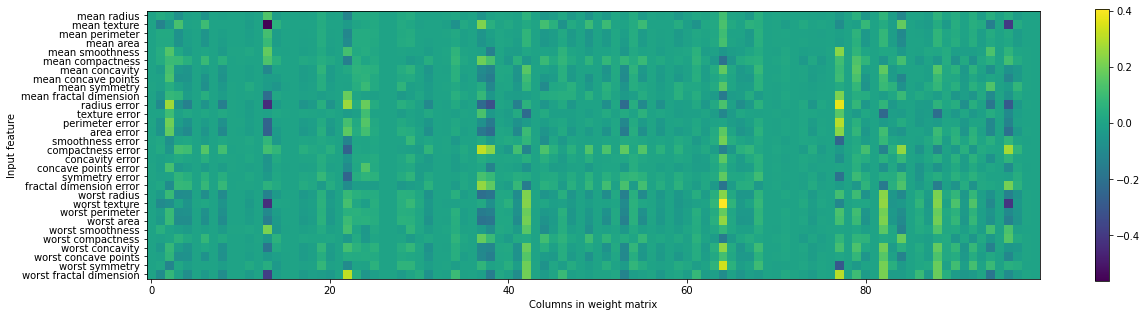

In [21]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

# Parte 2: Una breve introducción a _Keras_ con _Tensorflow_

*Keras* es una biblioteca Python que proporciona una interfaz para trabajar de manera cómoda y eficiente con redes neuronales y *Deep Learning* en general. El sistema *Keras* proporciona la interfaz a diversos sistemas Python especializados en Deep Learning, como *Tensorflow*, *Theano* o *CNTK*. En la actualidad podemos decir que es, junto con *Pytorch*, la interfaz más comunmente usada para el desarrollo de aplicaciones que usan Deep Learning. 

 En este cuaderno, veremos una muy breve introducción al uso de *Keras* para trabajar con redes neuronales multicapa, teniendo a *Tensorflow* como *backend*. *Tensorflow* es una biblioteca para Deep Learning, desarrollada por Google desde 2017, que permite construir y entrenar modelo basados en redes neuronales de manera muy eficiente. *Keras* nos proporciona una interfaz a *Tensorflow* de más alto nivel que si operáramos directamente con los métodos y estructuras de datos de *Tensorflow*.    
 
Lo que sigue está principamente basado en un ejemplo del capítulo 10 del libro:
 
**Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition**   
_Aurélien Géron_   
O'Reilly Media, Inc. 2019   

Vamos usar la versión de Keras que viene dentro de Tensorflow. Esta versión solo soporta a Tensorflow como *backend*, pero también tiene algunos extras respecto a la versión estándar.  

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
tf.__version__

'2.7.0'

In [24]:
keras.__version__

'2.7.0'

El ejemplo que vamos a tratar es *Fashion MNIST*, consistente en 70000 imágenes de distintos tipos de calzado y ropa, clasificados en 10 posibles clases. Las imágenes tienen un tamaño de 28x28 pixeles, cada uno de ellos codificado en escala de grises (de 0 a 255). Se trata de un problema de clasificación bastante más difícil que los que hemos visto hasta ahora.

En *Keras* tenemos una herramienta para cargar las imágenes directamente, con 60000 imágenes como conjunto de entrenamiento y 10000 en el conjunto de test:


In [25]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


Existen dos diferencias importantes en el conjunto de datos que acabamos de cargar, respecto de los conjunto de datos que hemos visto hasta ahora en _scikit-learn_. Una de ellas es que cada ejemplo es bidimensional (28x28). Otra diferencia es que las intensidades de los píxeles vienen dadas por números enteros.  

In [26]:
X_train_full.shape

(60000, 28, 28)

In [27]:
X_train_full.dtype

dtype('uint8')

En el desarrollo de este ejemplo, como ya veremos,  nos será util tener un conjunto de validación. Por tanto, nos quedamos con 55000 ejemplos en el conjunto de entrenamiento y 5000 para validación. Además, vamos a normalizar la intensidad de gris a un número entre 0 y 1, dividiendo por 255:   

In [28]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Veamos una imagen en concreto, para hacernos una idea. 

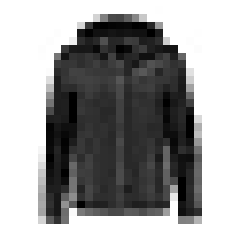

In [29]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Las clases se codifican de 0 a 9, correspondiendo cada dígito a una de las clases que aparecen a continuación: 

In [30]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [31]:
class_names = ["Camiseta", "Pantalón", "Chaleco", "Traje", "Abrigo",
               "Sandalia", "Camisa", "Zapatilla", "Bolso", "Botas"]


In [32]:
class_names[y_train[0]]

'Abrigo'

Con el siguiente código podemos ver una pequeña muestra de las imágenes de las que consta el conjunto de datos:

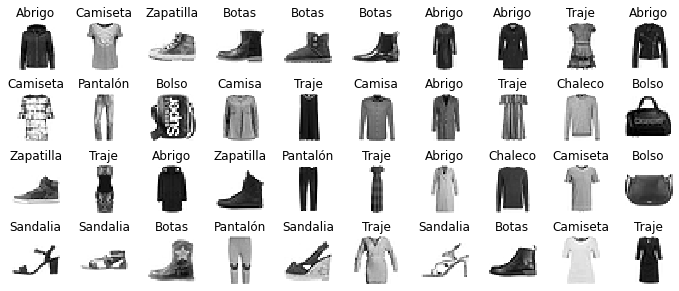

In [33]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Vamos a construir una red neuronal usando el módulo `Sequential` (tambén conocido como `Sequential` API). Para ello, simplemente añadimos capas (*layers*), indicando el tipo, el número de unidades y la función de activación: 

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Una manera alternativa de crear esta misma red sería:
#model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation="relu"),
#    keras.layers.Dense(100, activation="relu"),
#    keras.layers.Dense(10, activation="softmax")
#])


2021-12-27 03:45:19.631701: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Comentemos en más detalles cada una de las capas:

* La primera capa (la de entrada), es una capa de tipo `Flatten` que nos va a servir para "aplana" los ejemplos bidimensionales (28x28) en ejemplos unidimensionales (784). Esta capa se limita a realizar un `X.reshape(-1,1)` a cada ejemplo `X` de entrada. Podemos considerar por tanto que tenemos 784 unidades en la capa de entrada. 
* Las dos capas siguientes son de tipo `Dense`, una con 300 unidades y la siguiente con 100 unidades, con función de activación ReLU. Cada unidad en una capa de tipo `Dense` recibe tantas conexiones como unidades en la capa anterior, más un sesgo. 
* En la útima capa (la de salida), tenemos 10 unidades (una por valor de clasificación), con función de activación softmax. Por tanto, debemos interpretar la salida de cada unidad como la probabilidad de pertenecer a la correspondiente clase.    

Una vez construido el modelo, el atributo `layers` será una lista con las correspondientes capas. Sin embargo, si consultamos su valor lo que obtenemos por pantalla no sirve de mucho. Es mejor usar `summary`:

In [35]:
model.layers

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Para cada capa, se nos muestra:

* El tipo de la capa (flatten y densas, en este caso).
* El número de unidades de salida de cada capa (aquí `None` significa que puede recibir un número indeterminadao de ejemplos. salida de cada capa)
* El número de _parámetros_. Aquí por parámetro entendemos tanto pesos como sesgos. Veamos por qué tenemos esa cantidad de parámetros en cada capa:
   - La capa de entrada, por definición, no tiene parámetros (sólo se encarga de recoger los datos de entrada).
   - La primera capa oculta tiene 300 unidades y cada una recibe 784 conexiones y además hay que sumar los 300 sesgos: $300x784+300=235500$
   - La siguiente capa oculta es de 100 unidades. Por tanto son $300x100+100=30100$ parámetros
   - Por último, la capa de salida tiene $100x10+10=1010$ 
   
En total son 266610 parametros, una cantidad considerable si la comparamos con los modelos que hemos visto hasta ahora. 

Podemos explorar los pesos iniciales y los sesgos, mediante `get_weights`. Por ejemplo, de la primera capa oculta (`layers[1]`) obtenemos los arrays de pesos y bias:

In [37]:
[weights, biases] = model.layers[1].get_weights()

Podemos ver el tamaño de cada uno de estos arrays:

In [38]:
weights.shape, biases.shape


((784, 300), (300,))

Como hemos visto, la _matriz de pesos_ de cada capa tiene tantas filas como unidades tiene la capa anterior y tantas columnas como unidades tiene la propia capa. En este caso 784 filas y 300 columnas. Es decir, cada fila se corresponde con los coeficientes de las conexiones de una unidad. Además, la matriz (unidimensional) de sesgos tiene tantos elementos como unidades tiene la capa (300 en este caso). 

Una vez hemos creado el modelo, vamos a pensar en el entrenamiento de la red. Para ello debemos indicar tres aspectos fundamentales:

* La función de pérdida, coste o `loss`. En este caso, usamos `sparse_categorical_crossentropy`, la más indicada cuando tenemos varias clases mutuamente excluyentes, como es este caso. El objetivo, por tanto, es encontrar los pesos que minimizan la entropía cruzada.
* El optimizador (`optimizer`), que es el método para buscar los pesos adecuados. En este caso, descenso estocástico por el gradiente, `sgd`.
* La métrica (`metrics`) que nos permitirá medir el rendimiento del modelo, tanto sobre el conjunto de entrenamiento como sobre los de validación y test. En este caso, usamos `accuracy`, que mide el porcentaje de aciertos en la clasificación que realiza el modelo. 

El método `compile` nos permite especificar estas tres cosas:


In [39]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Ahora ya podemos entrenar el modelo, lo cual tomará algún tiempo. El método `fit` recibe el conjunto de entrenamiento, el número de _epochs_ y opcionalmente un conjunto de validación para ir midiendo el rendimiento durante el proceso. En cada epoch, se van a ir imprimiendo una serie de estadísticas, que comentamos más adelante. Las estadísticas del proceso de entrenamiento las guardaremos también en la variable `history`. 

In [40]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7097 - accuracy: 0.7656 - val_loss: 0.5071 - val_accuracy: 0.8334
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4871 - accuracy: 0.8307 - val_loss: 0.4731 - val_accuracy: 0.8338
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4438 - accuracy: 0.8444 - val_loss: 0.4356 - val_accuracy: 0.8530
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4157 - accuracy: 0.8538 - val_loss: 0.4025 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3962 - accuracy: 0.8612 - val_loss: 0.4162 - val_accuracy: 0.8486
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3789 - accuracy: 0.8664 - val_loss: 0.3712 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3646 - accuracy: 0.8711 - val_loss: 0.3627 - val_accuracy:

Por cada epoch, se ha ido imprimiendo la pérdida del modelo tanto sobre el conjunto de entrenamiento como sobre el de validación. Además el rendimiento (`accuracy` en este caso) igualmente sobre el entrenamiento y sobre validación.  

Como se observa, el rendimiento final sobre el conjunto de validación es cercano al 90%, lo cual está bastante bien teniendo en cuenta que este conjunto de datos es el más complicado de los vistos hasta ahora. 

Como decíamos, en `history` tenemos una serie de datos sobre el entrenamiento:

In [41]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

En particular, `history.history` es un diccionario que contiene los datos de pérdida y rendimiento que se han ido imprimiendo para cada epoch. Esto nos permite hacer una gráfica en la que vemos la evolución de ambas funciones, tanto sobre entrenamiento como sobre validación. 

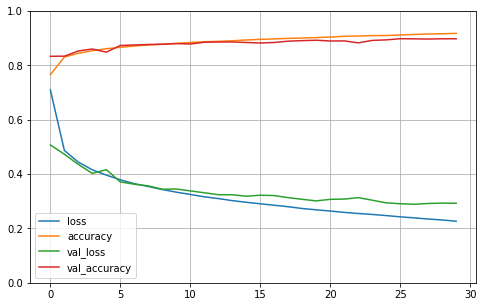

In [42]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

En la gráfica anterior se observa que a medida que transcurren los epochs se consigue el objetivo de bajar la función de pérdida sobre el conjunto de entrenamiento (y aumentar el rendimiento). También vemos que (aunque obviamente un poco peor), igualmente se rebaja la pérdida sobre el conjunto de validación y se aumenta el rendimiento, lo que quiere decir que no hay sobreajuste. 

Veamos ahora el rendimiento sobre el conjunto de prueba, también bastante bueno:

In [43]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8804


[0.3313918709754944, 0.8804000020027161]

Para finalizar, veamos la predicción (`predict`) sobre los tres primeros ejemplos del conjunto de test, y comprobemos si se ha acertado:

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Lo anterior son las probabilidades que se predicen para cada clase, en cada uno de los tres ejemplos. En el primer caso, la probabilidad mayor es la de la última clase (Botas), en el segundo es la clase tercera (Chaleco) y en tercero es la segunda clase (Pantalón). Podemos usar  el método `predict_classes` para ver las clases concretas que se predicen:

In [45]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [46]:
np.array(class_names)[y_pred]

array(['Botas', 'Chaleco', 'Pantalón'], dtype='<U9')

En este caso, se acierta en los tres ejemplos:

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Podemos incluso ver las imágenes, comprobando los aciertos:

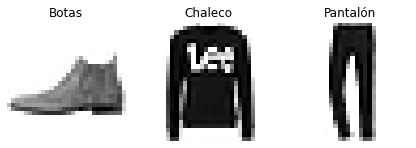

In [48]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()